In [1]:
import pandas as pd
import numpy as np
import data_handler as dh
import transport_graph as tg
import model
import time
import pickle
import itertools

In [2]:
net_name = 'Anaheim_net.tntp'
trips_name = 'Anaheim_trips.tntp'

In [3]:
handler = dh.DataHandler()
graph_data = handler.GetGraphData(net_name, columns_order = np.array([0, 1, 2, 4]))
graph_data['graph_table']

,Init node,Term node,Capacity,Free Flow Time
0,1,117,9000.0,1.090459
1,2,87,9000.0,1.090459
2,3,74,9000.0,1.090459
3,4,233,9000.0,1.090459
4,5,165,9000.0,1.090459
5,6,213,9000.0,1.090459
6,7,253,9000.0,1.090459
7,8,411,5400.0,1.000000
8,9,379,5400.0,1.000000
9,9,395,5400.0,1.000000


In [4]:
graph_correspondences, total_od_flow = handler.GetGraphCorrespondences(trips_name)
total_od_flow

104694.4

In [5]:
graph = tg.TransportGraph(graph_data)

# Experiment № 1

### $\epsilon = 10^{-3}$

### Universal Similar Triangles

TODO: model.py is changed, add solver_name = 'ustf'

In [6]:
gammas = np.r_[np.linspace(1.0, 0.2, 9), np.logspace(-1, -4, 10)]

In [7]:
epsilon = 1e-3

flows = []
times = []
iter_nums = []
duality_gaps = []

for gamma in gammas:
    tic = time.time()
    print('gamma = ' + str(gamma))
    result = model.model_solve(graph, graph_correspondences, total_od_flow, 
                               gamma = gamma, mu = 0.25, rho = 0.15, epsilon = epsilon, 
                               max_iter = 5000, verbose = True)
    toc = time.time()
    print('Elapsed time: {:.0f} sec'.format(toc - tic))
    flows.append(result['flows'])
    times.append(result['times'])
    iter_nums.append(result['iter_num'])
    duality_gaps.append(result['duality_gap_history'])

gamma = 1.0
Oracles created...
Universal similar triangles function...
primal_init = 571740.240874
dual_init = 1370652.84261
duality_gap_init = 1942393.08348
Iterations number: 1
Dual_gap_value = 1942393.08348
Primal_func_value = 571740.240874
Duality_gap / Duality_gap_init = 1.0
Iterations number: 5
Dual_gap_value = 138856.401635
Primal_func_value = -702799.151503
Duality_gap / Duality_gap_init = 0.0714872817536
iteration_num = 6: L_value = 39260.4
iteration_num = 7: L_value = 39260.4
iteration_num = 7: L_value = 78520.8
Success! Iterations number: 7
Primal_func_value = -755529.313463
Duality_gap / Duality_gap_init = -0.012783202368
Phi big oracle elapsed time: 55 sec
Elapsed time: 61 sec
gamma = 0.9
Oracles created...
Universal similar triangles function...
primal_init = 2110632.45719
dual_init = 918699.550223
duality_gap_init = 3029332.00741
Iterations number: 1
Dual_gap_value = 3029332.00741
Primal_func_value = 2110632.45719
Duality_gap / Duality_gap_init = 1.0
Iterations number: 5

iteration_num = 13: L_value = 3067.21875
Iterations number: 15
Dual_gap_value = 276.571725591
Primal_func_value = 1200363.66863
Duality_gap / Duality_gap_init = 0.00342923512584
iteration_num = 17: L_value = 383.40234375
Success! Iterations number: 17
Primal_func_value = 1200288.63429
Duality_gap / Duality_gap_init = 0.000718865875853
Phi big oracle elapsed time: 94 sec
Elapsed time: 96 sec
gamma = 0.0464158883361
Oracles created...
Universal similar triangles function...
primal_init = 1257862.3291
dual_init = -1168712.32732
duality_gap_init = 89150.0017769
Iterations number: 1
Dual_gap_value = 89150.0017769
Primal_func_value = 1257862.3291
Duality_gap / Duality_gap_init = 1.0
Iterations number: 5
Dual_gap_value = 80928.8396314
Primal_func_value = 1254610.94121
Duality_gap / Duality_gap_init = 0.907782815686
Iterations number: 10
Dual_gap_value = 16854.6215716
Primal_func_value = 1211585.82509
Duality_gap / Duality_gap_init = 0.189059127713
iteration_num = 13: L_value = 6608.12247692
i

iteration_num = 42: L_value = 4130.07654807
iteration_num = 42: L_value = 8260.15309615
iteration_num = 42: L_value = 16520.3061923
iteration_num = 44: L_value = 8260.15309615
iteration_num = 44: L_value = 16520.3061923
Iterations number: 45
Dual_gap_value = 146.480464389
Primal_func_value = 1205524.11984
Duality_gap / Duality_gap_init = 0.00156965573469
iteration_num = 47: L_value = 4130.07654807
iteration_num = 47: L_value = 8260.15309615
iteration_num = 47: L_value = 16520.3061923
iteration_num = 49: L_value = 8260.15309615
Success! Iterations number: 49
Primal_func_value = 1205512.28446
Duality_gap / Duality_gap_init = 0.000940343030728
Phi big oracle elapsed time: 393 sec
Elapsed time: 400 sec
gamma = 0.00215443469003
Oracles created...
Universal similar triangles function...
primal_init = 1263584.00377
dual_init = -1169255.33679
duality_gap_init = 94328.6669837
Iterations number: 1
Dual_gap_value = 94328.6669837
Primal_func_value = 1263584.00377
Duality_gap / Duality_gap_init = 1

iteration_num = 50: L_value = 153360.9375
Iterations number: 50
Dual_gap_value = 1011.43124564
Primal_func_value = 1205800.76347
Duality_gap / Duality_gap_init = 0.0106795596112
iteration_num = 53: L_value = 38340.234375
iteration_num = 53: L_value = 76680.46875
iteration_num = 54: L_value = 76680.46875
iteration_num = 54: L_value = 153360.9375
Iterations number: 55
Dual_gap_value = 679.554387731
Primal_func_value = 1205724.91794
Duality_gap / Duality_gap_init = 0.00717531876152
iteration_num = 56: L_value = 76680.46875
iteration_num = 57: L_value = 76680.46875
iteration_num = 58: L_value = 76680.46875
iteration_num = 59: L_value = 76680.46875
iteration_num = 60: L_value = 76680.46875
Iterations number: 60
Dual_gap_value = 481.909673195
Primal_func_value = 1205681.3737
Duality_gap / Duality_gap_init = 0.0050884161472
iteration_num = 61: L_value = 76680.46875
iteration_num = 62: L_value = 76680.46875
iteration_num = 64: L_value = 38340.234375
iteration_num = 64: L_value = 76680.46875
it

iteration_num = 85: L_value = 82601.5309615
iteration_num = 85: L_value = 165203.061923
Iterations number: 85
Dual_gap_value = 408.633816034
Primal_func_value = 1205672.78915
Duality_gap / Duality_gap_init = 0.00430916793261
iteration_num = 87: L_value = 82601.5309615
iteration_num = 87: L_value = 165203.061923
iteration_num = 89: L_value = 82601.5309615
iteration_num = 89: L_value = 165203.061923
Iterations number: 90
Dual_gap_value = 318.255868616
Primal_func_value = 1205654.73794
Duality_gap / Duality_gap_init = 0.00335610497613
iteration_num = 91: L_value = 82601.5309615
iteration_num = 92: L_value = 82601.5309615
iteration_num = 93: L_value = 82601.5309615
iteration_num = 94: L_value = 82601.5309615
iteration_num = 94: L_value = 165203.061923
Iterations number: 95
Dual_gap_value = 248.091496838
Primal_func_value = 1205640.76641
Duality_gap / Duality_gap_init = 0.00261620032552
iteration_num = 96: L_value = 82601.5309615
iteration_num = 97: L_value = 82601.5309615
iteration_num = 9

iteration_num = 87: L_value = 177959.603753
iteration_num = 88: L_value = 177959.603753
iteration_num = 88: L_value = 355919.207506
iteration_num = 90: L_value = 177959.603753
iteration_num = 90: L_value = 355919.207506
Iterations number: 90
Dual_gap_value = 633.770976515
Primal_func_value = 1205725.6562
Duality_gap / Duality_gap_init = 0.0066677588518
iteration_num = 91: L_value = 355919.207506
iteration_num = 93: L_value = 177959.603753
iteration_num = 93: L_value = 355919.207506
iteration_num = 94: L_value = 355919.207506
iteration_num = 94: L_value = 711838.415012
Iterations number: 95
Dual_gap_value = 537.445976625
Primal_func_value = 1205704.52931
Duality_gap / Duality_gap_init = 0.00565434565607
iteration_num = 97: L_value = 177959.603753
iteration_num = 98: L_value = 177959.603753
iteration_num = 99: L_value = 177959.603753
iteration_num = 99: L_value = 355919.207506
Iterations number: 100
Dual_gap_value = 439.467578586
Primal_func_value = 1205683.79253
Duality_gap / Duality_ga

iteration_num = 67: L_value = 383402.34375
iteration_num = 68: L_value = 383402.34375
iteration_num = 68: L_value = 766804.6875
iteration_num = 68: L_value = 1533609.375
Iterations number: 70
Dual_gap_value = 2198.10654958
Primal_func_value = 1206158.67712
Duality_gap / Duality_gap_init = 0.023077270395
iteration_num = 71: L_value = 383402.34375
iteration_num = 71: L_value = 766804.6875
iteration_num = 73: L_value = 383402.34375
iteration_num = 73: L_value = 766804.6875
iteration_num = 73: L_value = 1533609.375
iteration_num = 75: L_value = 766804.6875
Iterations number: 75
Dual_gap_value = 1755.57674925
Primal_func_value = 1205948.63475
Duality_gap / Duality_gap_init = 0.0184312809356
iteration_num = 76: L_value = 766804.6875
iteration_num = 77: L_value = 766804.6875
iteration_num = 78: L_value = 766804.6875
iteration_num = 80: L_value = 383402.34375
iteration_num = 80: L_value = 766804.6875
Iterations number: 80
Dual_gap_value = 1430.82666686
Primal_func_value = 1205848.91989
Duality

In [8]:
with open('results_anaheim_exp1_1e-03_ustf_correct.pickle', 'wb') as f:
    results = {'flows': flows,
               'times': times,
               'iter_nums': iter_nums,
               'gammas': gammas,
               'duality_gaps': duality_gaps}
    pickle.dump(results, f)

### Universal gradient descent

In [6]:
gammas = np.r_[np.linspace(1.0, 0.2, 9), np.logspace(-1, -4, 10)]

In [7]:
epsilon = 1e-3

flows = []
times = []
iter_nums = []
duality_gaps = []

for gamma in gammas:
    tic = time.time()
    print('gamma = ' + str(gamma))
    result = model.model_solve(graph, graph_correspondences, total_od_flow, 
                               solver_name = 'ugd',
                               gamma = gamma, mu = 0.25, rho = 0.15, epsilon = epsilon, 
                               max_iter = 5000, verbose = True)
    toc = time.time()
    print('Elapsed time: {:.0f} sec'.format(toc - tic))
    flows.append(result['flows'])
    times.append(result['times'])
    iter_nums.append(result['iter_num'])
    duality_gaps.append(result['duality_gap_history'])

gamma = 1.0
Oracles created...
Universal gradient descent...
Iterations number: 1
Duality_gap / Duality_gap_init = 1.0
iteration_num = 5: L_value = 39260.4
iteration_num = 5: L_value = 78520.8
iteration_num = 5: L_value = 157041.6
Iterations number: 5
Duality_gap / Duality_gap_init = 0.247810168758
iteration_num = 7: L_value = 78520.8
iteration_num = 7: L_value = 157041.6
iteration_num = 7: L_value = 314083.2
Iterations number: 10
Duality_gap / Duality_gap_init = 0.09548247403
iteration_num = 11: L_value = 39260.4
iteration_num = 11: L_value = 78520.8
iteration_num = 11: L_value = 157041.6
iteration_num = 12: L_value = 157041.6
iteration_num = 14: L_value = 78520.8
iteration_num = 14: L_value = 157041.6
iteration_num = 14: L_value = 314083.2
Iterations number: 15
Duality_gap / Duality_gap_init = 0.0498495556195
iteration_num = 19: L_value = 19630.2
iteration_num = 19: L_value = 39260.4
iteration_num = 19: L_value = 78520.8
iteration_num = 19: L_value = 157041.6
iteration_num = 20: L_va

iteration_num = 36: L_value = 196302.0
iteration_num = 38: L_value = 98151.0
iteration_num = 38: L_value = 196302.0
iteration_num = 40: L_value = 98151.0
iteration_num = 40: L_value = 196302.0
Iterations number: 40
Duality_gap / Duality_gap_init = 0.00398021788464
iteration_num = 42: L_value = 98151.0
iteration_num = 42: L_value = 196302.0
iteration_num = 43: L_value = 196302.0
iteration_num = 45: L_value = 98151.0
Iterations number: 45
Duality_gap / Duality_gap_init = 0.00319520637725
iteration_num = 46: L_value = 98151.0
iteration_num = 46: L_value = 196302.0
iteration_num = 48: L_value = 98151.0
iteration_num = 48: L_value = 196302.0
iteration_num = 50: L_value = 98151.0
iteration_num = 50: L_value = 196302.0
Iterations number: 50
Duality_gap / Duality_gap_init = 0.00264407618648
iteration_num = 52: L_value = 98151.0
iteration_num = 52: L_value = 196302.0
iteration_num = 54: L_value = 98151.0
iteration_num = 54: L_value = 196302.0
iteration_num = 55: L_value = 196302.0
Iterations nu

iteration_num = 22: L_value = 261736.0
iteration_num = 24: L_value = 130868.0
iteration_num = 24: L_value = 261736.0
Iterations number: 25
Duality_gap / Duality_gap_init = 0.00283073528082
iteration_num = 26: L_value = 130868.0
iteration_num = 27: L_value = 130868.0
iteration_num = 28: L_value = 130868.0
iteration_num = 28: L_value = 261736.0
iteration_num = 30: L_value = 130868.0
Iterations number: 30
Duality_gap / Duality_gap_init = 0.00218278208484
iteration_num = 31: L_value = 130868.0
iteration_num = 31: L_value = 261736.0
iteration_num = 35: L_value = 32717.0
iteration_num = 35: L_value = 65434.0
iteration_num = 35: L_value = 130868.0
iteration_num = 35: L_value = 261736.0
Iterations number: 35
Duality_gap / Duality_gap_init = 0.00168711219914
iteration_num = 38: L_value = 65434.0
iteration_num = 38: L_value = 130868.0
iteration_num = 38: L_value = 261736.0
iteration_num = 40: L_value = 130868.0
Iterations number: 40
Duality_gap / Duality_gap_init = 0.00139370240957
iteration_num

Iterations number: 5
Duality_gap / Duality_gap_init = 0.627798279932
Iterations number: 10
Duality_gap / Duality_gap_init = 0.273113745196
iteration_num = 12: L_value = 1533.609375
iteration_num = 12: L_value = 3067.21875
iteration_num = 12: L_value = 6134.4375
iteration_num = 12: L_value = 12268.875
iteration_num = 12: L_value = 24537.75
iteration_num = 12: L_value = 49075.5
iteration_num = 13: L_value = 49075.5
iteration_num = 14: L_value = 49075.5
iteration_num = 15: L_value = 49075.5
Iterations number: 15
Duality_gap / Duality_gap_init = 0.121075551594
iteration_num = 16: L_value = 49075.5
iteration_num = 17: L_value = 49075.5
iteration_num = 19: L_value = 24537.75
iteration_num = 19: L_value = 49075.5
iteration_num = 19: L_value = 98151.0
Iterations number: 20
Duality_gap / Duality_gap_init = 0.0707162341251
iteration_num = 22: L_value = 24537.75
iteration_num = 23: L_value = 24537.75
iteration_num = 23: L_value = 49075.5
iteration_num = 24: L_value = 49075.5
iteration_num = 25: L

KeyboardInterrupt: 

In [ ]:
with open('results_anaheim_exp1_1e-03_ugd.pickle', 'wb') as f:
    results = {'flows': flows,
               'times': times,
               'iter_nums': iter_nums,
               'gammas': gammas,
               'duality_gaps': duality_gaps}
    pickle.dump(results, f)

#### flow_star

In [9]:
with open('anaheim_result_fwa_3e-5.pickle', 'rb') as f:
    result_star = pickle.load(f)
    flow_star = result_star['flows']
    primal = result_star['primal_func_history']

#### ustf corrected

In [17]:
with open('results_anaheim_exp1_1e-03_ustf_correct.pickle', 'rb') as f:
    result = pickle.load(f)
    flows = result['flows']
    gammas = result['gammas']
    iter_nums = result['iter_nums']
iter_nums

[7, 9, 20, 16, 16, 11, 7, 9, 15, 17, 22, 28, 39, 49, 67, 86, 116, 141, 181]

In [11]:
delta = []
for flow in flows:
    delta.append(np.linalg.norm(flow - flow_star, ord = 1) / np.linalg.norm(flow_star, ord = 1))
delta

[2.0179650543784975,
 1.9741382744795519,
 1.6472744989583483,
 1.4412056940261031,
 1.2106081422828274,
 0.98186484079288505,
 0.7848992127361637,
 0.51419795549284775,
 0.24524767424954858,
 0.061354922253203339,
 0.02615355580496035,
 0.017604930862590681,
 0.012768281292798901,
 0.0092380289209395405,
 0.007418499016410565,
 0.0055472654907742155,
 0.0042852145296931963,
 0.0035485634242371175,
 0.0030334495106849133]

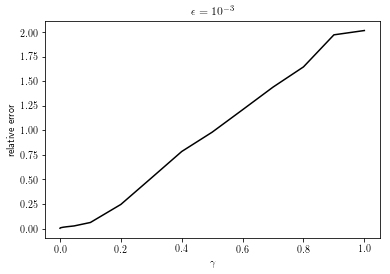

In [14]:
import matplotlib.pyplot as plt
epsilon = 1e-3
plt.rc('text', usetex = True)
#plt.font = {'family': 'Verdana', 'weight': 'normal'}
#plt.rc('font', **font)
plt.plot(gammas, delta, 'black')
plt.title(r'$\epsilon = 10^{-3}$')
plt.xlabel(r'$\gamma$')
plt.ylabel(r'relative error')
#plt.savefig('anaheim_delta_vs_gamma_{0:.0e}_ustf_corrected.png'.format(epsilon), dpi=300)
plt.show()

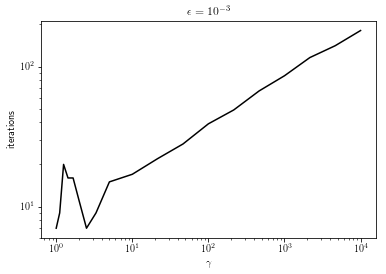

In [22]:
epsilon = 1e-3
plt.rc('text', usetex = True)
#plt.font = {'family': 'Verdana', 'weight': 'normal'}
#plt.rc('font', **font)
plt.loglog(1.0 / np.array(gammas), iter_nums, 'black')
plt.title(r'$\epsilon = 10^{-3}$')
plt.xlabel(r'$\gamma$')
plt.ylabel(r'iterations')
#plt.savefig('anaheim_iters_vs_gamma_{0:.0e}_ustf_corrected_loglog.png'.format(epsilon), dpi=300)
plt.show()